## Paris 2024 Olympic Summer Game

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the CSV file

df = pd.read_csv('athletes.csv')

In [11]:
# Display basic information about the dataset
print(df.columns)

Index(['code', 'current', 'name', 'name_short', 'name_tv', 'gender',
       'function', 'country_code', 'country', 'country_long', 'nationality',
       'nationality_long', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country',
       'residence_place', 'residence_country', 'nickname', 'hobbies',
       'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual',
       'other_sports'],
      dtype='object')


In [12]:
# Show the first few rows of the dataset
print("\
First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      code  current               name     name_short            name_tv  \
0  1532872     True   ALEKSANYAN Artur   ALEKSANYAN A   Artur ALEKSANYAN   
1  1532873     True     AMOYAN Malkhas       AMOYAN M     Malkhas AMOYAN   
2  1532874     True    GALSTYAN Slavik     GALSTYAN S    Slavik GALSTYAN   
3  1532944     True  HARUTYUNYAN Arsen  HARUTYUNYAN A  Arsen HARUTYUNYAN   
4  1532945     True    TEVANYAN Vazgen     TEVANYAN V    Vazgen TEVANYAN   

  gender function country_code  country country_long  ...  \
0   Male  Athlete          ARM  Armenia      Armenia  ...   
1   Male  Athlete          ARM  Armenia      Armenia  ...   
2   Male  Athlete          ARM  Armenia      Armenia  ...   
3   Male  Athlete          ARM  Armenia      Armenia  ...   
4   Male  Athlete          ARM  Armenia      Armenia  ...   

                                              family  \
0                          Father, Gevorg Aleksanyan   
1                                

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11113 non-null  int64  
 1   current             11113 non-null  bool   
 2   name                11113 non-null  object 
 3   name_short          11110 non-null  object 
 4   name_tv             11110 non-null  object 
 5   gender              11113 non-null  object 
 6   function            11113 non-null  object 
 7   country_code        11113 non-null  object 
 8   country             11113 non-null  object 
 9   country_long        11113 non-null  object 
 10  nationality         11110 non-null  object 
 11  nationality_long    11110 non-null  object 
 12  nationality_code    11110 non-null  object 
 13  height              11110 non-null  float64
 14  weight              11108 non-null  float64
 15  disciplines         11113 non-null  object 
 16  even

In [6]:
# Display summary statistics
print("\
Summary statistics:")
print(df.describe())

Summary statistics:
               code        height        weight
count  1.111300e+04  11110.000000  11108.000000
mean   1.887418e+06     81.798830      2.211919
std    3.588006e+05     89.508247     13.109608
min    1.532872e+06      0.000000      0.000000
25%    1.888184e+06      0.000000      0.000000
50%    1.918840e+06      0.000000      0.000000
75%    1.948950e+06    177.000000      0.000000
max    9.460001e+06    222.000000    113.000000


In [7]:
# Count the number of athletes by gender
gender_counts = df['gender'].value_counts()
print("\
Number of athletes by gender:")
print(gender_counts)

Number of athletes by gender:
gender
Male      5658
Female    5455
Name: count, dtype: int64


In [9]:
# Count the number of athletes by country
country_counts = df['country'].value_counts().head(10)
print("\
Top 10 countries by number of athletes:")
print(country_counts)

Top 10 countries by number of athletes:
country
United States    619
France           601
Australia        475
Germany          457
Japan            431
Spain            401
China            398
Italy            397
Great Britain    343
Canada           332
Name: count, dtype: int64


In [42]:
# Age statistics
age_stats = df['age'].describe()
print("Age Statistics:")
print(age_stats)

Age Statistics:
count    11113.000000
mean        24.039625
std          5.406428
min          8.947296
25%         20.336756
50%         23.468857
75%         27.008898
max         66.642026
Name: age, dtype: float64


In [11]:
# Count the number of athletes by discipline
discipline_counts = df['disciplines'].value_counts().head(10)
print("\
Top 10 disciplines by number of athletes:")
print(discipline_counts)
# Calculate age by dividing the timedelta in days by 365.25
olympic_date = pd.to_datetime('2021-07-23')  # Opening ceremony date
df['age'] = (olympic_date - df['birth_date']).dt.days / 365.25

Top 10 disciplines by number of athletes:
disciplines
['Athletics']       2018
['Swimming']         836
['Football']         553
['Rowing']           493
['Hockey']           415
['Handball']         386
['Judo']             378
['Shooting']         342
['Sailing']          330
['Rugby Sevens']     317
Name: count, dtype: int64


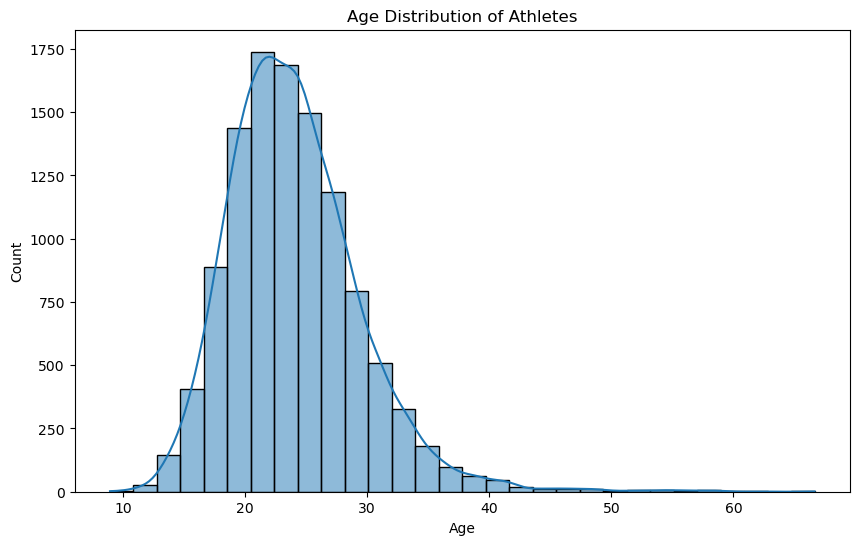

In [40]:
# Convert birth_date column to datetime format
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Create histogram of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.show()

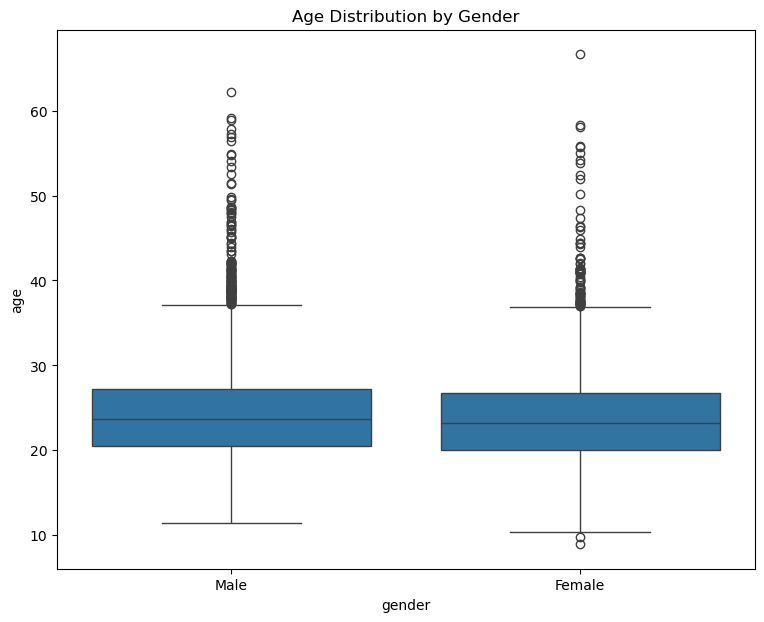

In [53]:
# Age distribution by gender (box plot)
plt.figure(figsize=(9, 7))
sns.boxplot(data=df, x='gender', y='age')
plt.title('Age Distribution by Gender')
plt.savefig('age_distribution_by_gender')
plt.show()

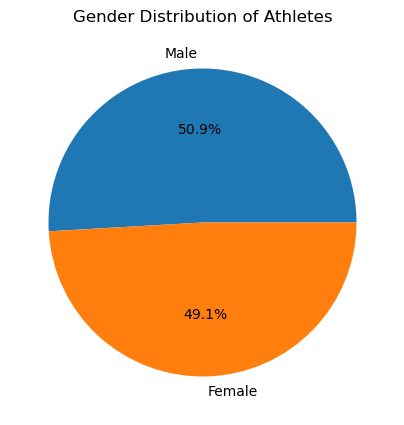

In [43]:
# Gender distribution
plt.figure(figsize=(5, 5))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Athletes')
plt.savefig('gender_distribution_pie')
plt.show()

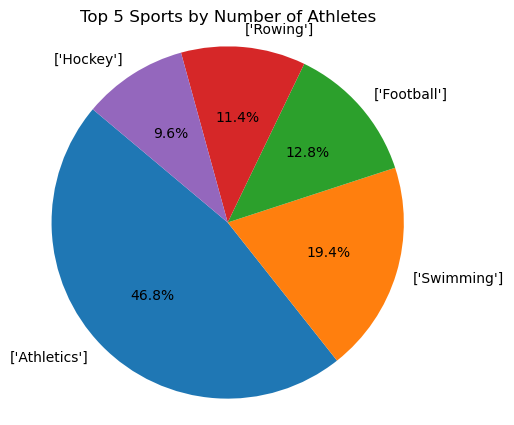

In [38]:
# Extract the top 5 disciplines by number of athletes

top_disciplines = df['disciplines'].value_counts().head(5)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(top_disciplines, labels=top_disciplines.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Sports by Number of Athletes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

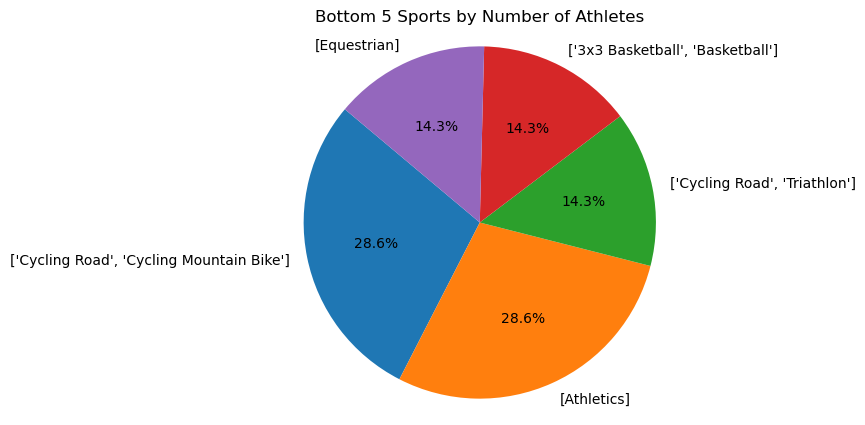

In [39]:
# Extract the bottom 5 disciplines by number of athletes
bottom_disciplines = df['disciplines'].value_counts().tail(5)

# Create a pie chart for the bottom 10 disciplines
plt.figure(figsize=(5, 5))
plt.pie(bottom_disciplines, labels=bottom_disciplines.index, autopct='%1.1f%%', startangle=140)
plt.title('Bottom 5 Sports by Number of Athletes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

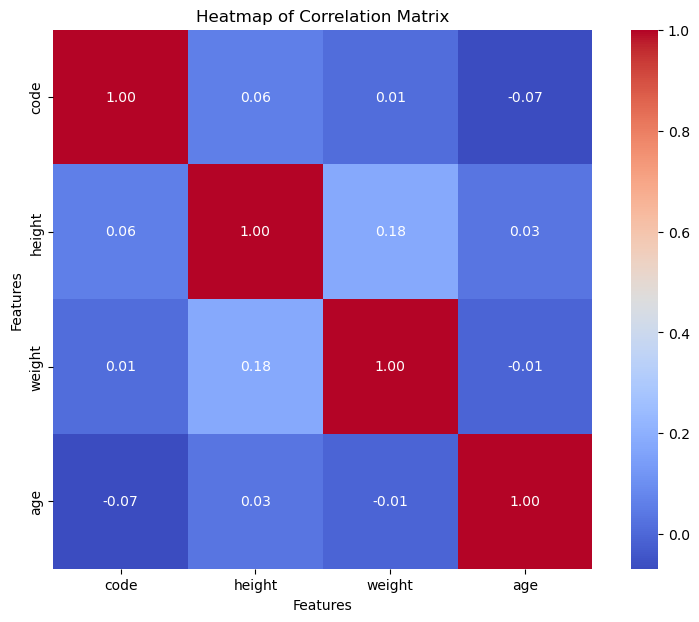

In [47]:
# Select only the numeric columns from the dataframe
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 7))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# Paris Olympic Project Summary

The dataset analyzed contains information on **11,114 athletes**, featuring **36 columns** that encompass various attributes, including personal details, nationalities, and sporting information.

Key Insights:
- **Unique Athletes**: There are **11,103 unique athlete names**.
- **Countries Represented**: Athletes come from **206 different countries**.
- **Disciplines**: The dataset includes **52 unique disciplines**.
- **Gender Distribution**: The gender distribution is fairly balanced, with **5,658 male** and **5,455 female athletes**.

Additionally, a visualization showcasing the **top 20 disciplines** has been created to highlight the most popular sports among athletes.